<h1>
Exercício 2
</h1>
<h2>
Gerar um modelo para classificar novos clientes usando as divisões encontradas no Exercício 1.
</h2>

# Bibliotecas

In [147]:
%matplotlib inline

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

<h1>Carregando os Dados</h1>
<h2>
Vamos utilizar para este exercício a saída do exercício 1.<BR> 
Esta base possui apenas uma entrada por cliente e uma coluna para os clusters.
</h2>

In [148]:
df = pd.read_csv("./df_ex1.csv")

In [149]:
df.head()

,cnpjSemTraco,prazoMedioRecebimentoVendas,titulosEmAberto,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,custos,capitalSocial,restricoes,empresa_MeEppMei,limiteEmpresaAnaliseCredito,kmeans
0,IYZA05872767332466,0,0.0,437853.0,272388.0,450614.0,178225.0,0.0,0.0,201085.0,624350.0,-3319.0,-431401.0,40000.0,False,True,10800.0,0
1,MJEK50274612793018,63,10368.0,382348.0,890140.0,627034.0,460656.0,0.0,128803.0,212674.0,1177807.0,0.0,0.0,50000.0,False,True,44000.0,0
2,FECA48063802482890,0,0.0,714851.0,188269.0,728846.0,1402031.0,0.0,652153.0,0.0,1249651.0,302367.0,2183996.0,100000.0,False,True,165850.0,0
3,PMQC81082938911940,0,0.0,95762.0,293393.0,4786692.0,4493298.0,0.0,3212721.0,1195553.0,5368371.0,1346068.0,2072196.0,500000.0,False,True,194114.0,0
4,OGWM99265986867408,0,0.0,911113.0,509051.0,926368.0,451271.0,0.0,0.0,619908.0,572776.0,0.0,0.0,80000.0,False,True,63000.0,0


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cnpjSemTraco                 1523 non-null   object 
 1   prazoMedioRecebimentoVendas  1523 non-null   int64  
 2   titulosEmAberto              1523 non-null   float64
 3   ativoCirculante              1523 non-null   float64
 4   passivoCirculante            1523 non-null   float64
 5   totalAtivo                   1523 non-null   float64
 6   totalPatrimonioLiquido       1523 non-null   float64
 7   endividamento                1523 non-null   float64
 8   duplicatasAReceber           1523 non-null   float64
 9   estoque                      1523 non-null   float64
 10  faturamentoBruto             1523 non-null   float64
 11  margemBruta                  1523 non-null   float64
 12  custos                       1523 non-null   float64
 13  capitalSocial     

<h1>Árvore de Decisão</h1>
<h2>
Decidimos usar o modelo mais simples possivel para tentar resolver este problema de classificação.
</h2>

<h2>
Com o banco acima vamos preparar a entrada para o nosso modelo escolhido.<BR>
Vamos dividir a base em treino e teste com 70% para o treino.<BR>
</h2>

In [151]:
x = df.drop(['cnpjSemTraco', 'kmeans'], axis=1)
y = df.kmeans

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

<h2>Criando e treinando o modelo</h2>

In [153]:
dtf = DecisionTreeClassifier(random_state=42)
clf_tree = dtf.fit(x_train, y_train)

<h2>
Visualização da árvore
</h2>

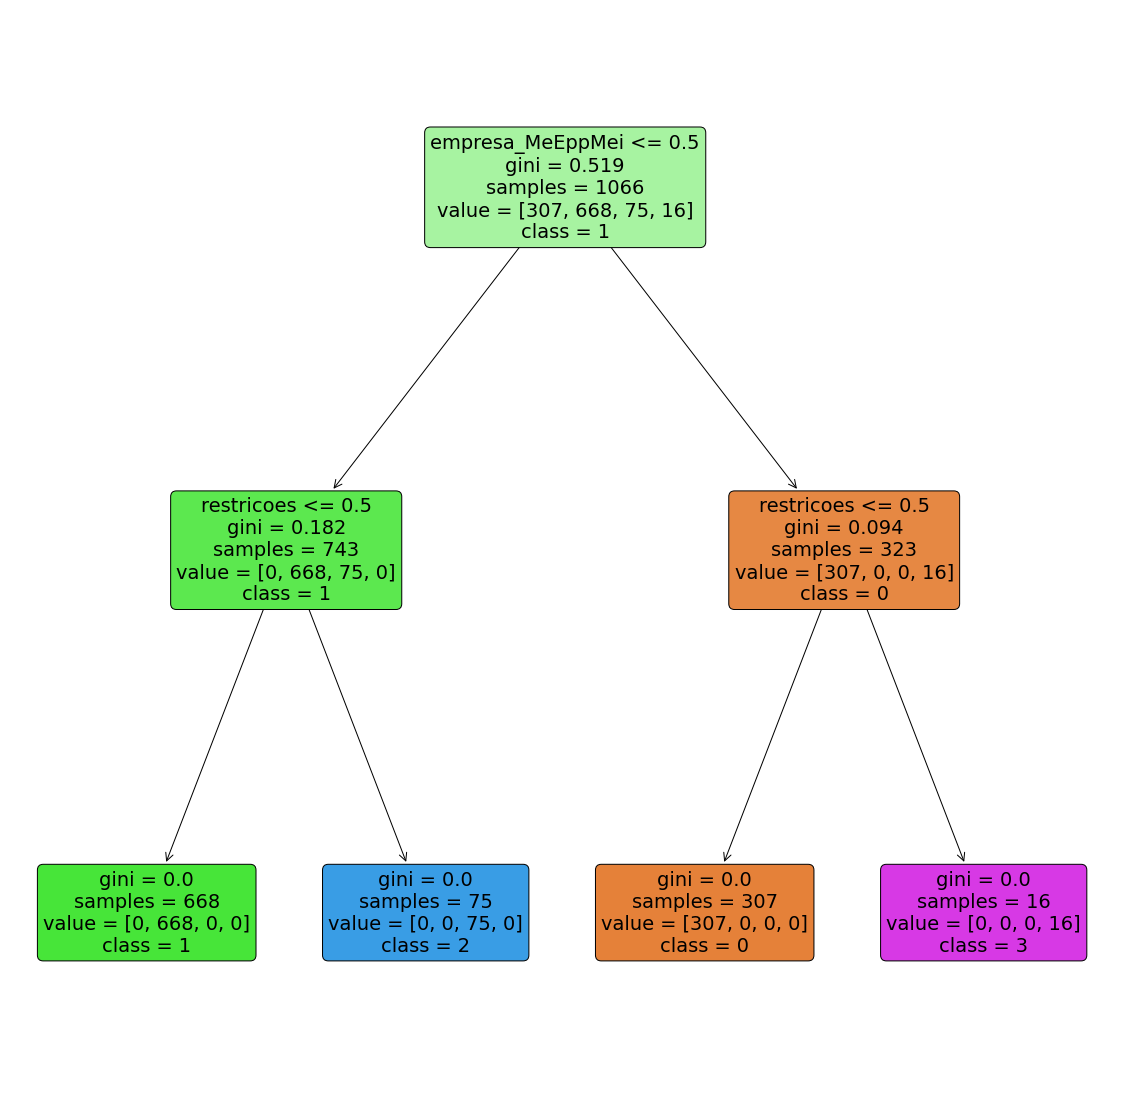

In [154]:
fig = plt.figure(figsize=(20,20))
tree = plot_tree(clf_tree, feature_names=x_train.columns, rounded=True, class_names=['0', '1', '2', '3', '4'], filled=True)

<h1>
Análise do Modelo
</h1>

In [155]:
#clf_tree.score(x_test, y_test)
y_pred = clf_tree.predict(x_test)
y_p_train = clf_tree.predict(x_train)
print(f"R2 score do treino: {round(r2_score(y_train, y_p_train), 4)}")
print(f"R2 score do teste: {round(r2_score(y_test, y_pred), 4)}")

R2 score do treino: 1.0
R2 score do teste: 1.0


<h1>
O R2 score do nosso modelo está ótimo!
</h1>
<h2>
Vamos agora fazer alguns testes com dados aleatórios para testar a performance do modelo.
</h2>

<h1>
Carregando a base pré processada completa.
</h1>
<h2>
Sempre que formos carregar dados para colocar no nosso modelo vamos precisar de um pré processamento para deixar apenas os dados a serem utilizados pelo mesmo.<BR>
No caso da base pré processsada precisamos eliminar as mesmas colunas que retiramos no Exercicio 1.
</h2>

In [239]:
df_teste = pd.read_csv("./df_pre_processado.csv")

df_teste.shape

(6012, 38)

In [240]:
df_teste.drop(['scorePontualidade', 'maiorAtraso', 'valorAprovado', 'valorSolicitado', 'dataAprovadoEmComite', 'dataAprovadoNivelAnalista', 'numero_solicitacao',
         'razaoSocial', 'nomeFantasia', 'status', 'definicaoRisco', 'anoFundacao', 'diferencaPercentualRisco', 'dashboardCorrelacao', 'percentualRisco',
         'periodoBalanco', 'primeiraCompra', 'intervaloFundacao', 'periodoDemonstrativoEmMeses', 'percentualProtestos', 'margemBrutaAcumulada'], axis=1, inplace=True)

In [241]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cnpjSemTraco                 6012 non-null   object 
 1   prazoMedioRecebimentoVendas  6012 non-null   int64  
 2   titulosEmAberto              6012 non-null   float64
 3   ativoCirculante              6012 non-null   float64
 4   passivoCirculante            6012 non-null   float64
 5   totalAtivo                   6012 non-null   float64
 6   totalPatrimonioLiquido       6012 non-null   float64
 7   endividamento                6012 non-null   float64
 8   duplicatasAReceber           6012 non-null   float64
 9   estoque                      6012 non-null   float64
 10  faturamentoBruto             6012 non-null   float64
 11  margemBruta                  6012 non-null   float64
 12  custos                       6012 non-null   float64
 13  capitalSocial     

<h3>
Agora vamos aplicar os clusters encontrados no Exercício 1 a esta base de teste.
</h3>

In [242]:
cluster = []

for cnpj in df_teste.cnpjSemTraco:
    cluster.append(df[df.cnpjSemTraco == cnpj].kmeans.values[0])
    
df_teste['cluster'] = cluster    
    

<h3>
E como ainda temos valores faltantes (nulos), vamos preencher com a média de cada variável.
</h3> 

In [243]:
df_teste.fillna(df_teste.mean())

,cnpjSemTraco,prazoMedioRecebimentoVendas,titulosEmAberto,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,custos,capitalSocial,restricoes,empresa_MeEppMei,limiteEmpresaAnaliseCredito,cluster
0,KEBE17609492220843,0,0.00,1744687.0,241538.0,1876039.0,1634500.0,0.0,414506.0,661066.0,1766880.0,0.0,0.0,90000.0,False,True,43200.0,0
1,GCVQ28531614261293,0,0.00,2949687.0,1664725.0,3059460.0,1268510.0,364717.0,1062227.0,777818.0,2814940.0,0.0,0.0,20000.0,False,True,4320.0,1
2,CGQN15826802440348,20,1486.95,14758917.0,12149031.0,25793410.0,14544378.0,3039112.0,11797928.0,3047791.0,40779757.0,81459809.0,40680051.0,75000.0,False,False,89000.0,1
3,PYOL43118620147076,0,0.00,95759717.0,71074553.0,189929772.0,92022972.0,276058.0,45422098.0,34892991.0,239016696.0,-7540544.0,156394112.0,30515674.0,True,False,18132588.0,2
4,NLUX93496216176463,102,208980.00,17801610.0,2538069.0,19415777.0,7519758.0,0.0,3742963.0,11902384.0,11958227.0,9357949.0,0.0,120000.0,False,False,768233.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,XIIJ66670040144884,28,6804.00,20070708.0,18164050.0,20290799.0,1893943.0,74793.0,11285664.0,5718842.0,133280394.0,44612644.0,88667750.0,833345.0,False,False,7200000.0,1
6008,JXCH36268697453955,44,90290.90,4943835.0,4025065.0,5633038.0,905806.0,1257000.0,3471368.0,1316604.0,4887005.0,2322234.0,2564771.0,30000.0,False,False,60000.0,1
6009,IPFS70635894073808,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5392166.0,246578.0,5145588.0,110000.0,False,True,3240.0,0
6010,IFOK15843566708440,64,1276462.66,38305921.0,15063464.0,40876769.0,25603650.0,46198.0,15784605.0,15243870.0,119702196.0,38587967.0,81114229.0,2000000.0,False,False,10833160.0,1


<h1>
Calculo da Acurácia com esta base de teste.
</h1>

In [244]:
corretos = 0

for x in df_teste.values:
    amostra = x[1:-1].reshape(1,-1)
    real = x[-1]
    previsto = clf_tree.predict(amostra)[0]
    corretos += 1 if real == previsto else 0
    
print(f"Acurácia com a base de teste {round(corretos / df_teste.shape[0]*100,2)}%")

Acurácia com a base de teste 88.12%


<h1>Exemplo de um amostra para o teste</h1>

In [156]:
numero = np.random.random_integers(df_teste.shape[0])
amostra = df_teste.iloc[numero,:]
amostra


cnpjSemTraco                   MRYF85659654667402
prazoMedioRecebimentoVendas                   344
titulosEmAberto                           17193.6
ativoCirculante                          805168.0
passivoCirculante                        166149.0
totalAtivo                               843746.0
totalPatrimonioLiquido                   100000.0
endividamento                                 0.0
duplicatasAReceber                       572276.0
estoque                                  224142.0
faturamentoBruto                        2022711.0
margemBruta                              736430.0
custos                                  1286281.0
capitalSocial                            100000.0
restricoes                                  False
empresa_MeEppMei                            False
limiteEmpresaAnaliseCredito               48600.0
cluster                                         1
Name: 4162, dtype: object

<h1>Teste do cluster 0</h1>

In [215]:
df_k = df_teste[df_teste.cluster == 0]
numero = np.random.random_integers(df_k.shape[0])
amostra = df_k.iloc[numero, 1:-1]
amostra

prazoMedioRecebimentoVendas              0
titulosEmAberto                        0.0
ativoCirculante                  3789231.0
passivoCirculante                 846020.0
totalAtivo                       4149907.0
totalPatrimonioLiquido            521942.0
endividamento                     772841.0
duplicatasAReceber               2231773.0
estoque                          2894639.0
faturamentoBruto               117090514.0
margemBruta                       499790.0
custos                          -7231554.0
capitalSocial                     100000.0
restricoes                           False
empresa_MeEppMei                      True
limiteEmpresaAnaliseCredito       221884.0
Name: 35, dtype: object

In [216]:
amostra = np.array(amostra).reshape(1,-1)
print(f"Cluster Previsto: {clf_tree.predict(amostra)[0]}")

Cluster Previsto: 0


<h1>Teste do cluster 1</h1>

In [217]:
df_k = df_teste[df_teste.cluster == 1]
numero = np.random.random_integers(df_k.shape[0])
amostra = df_k.iloc[numero, 1:-1]
amostra

prazoMedioRecebimentoVendas           50
titulosEmAberto                 12336.67
ativoCirculante                      0.0
passivoCirculante                    0.0
totalAtivo                           0.0
totalPatrimonioLiquido               0.0
endividamento                        0.0
duplicatasAReceber                   0.0
estoque                              0.0
faturamentoBruto               2092278.0
margemBruta                          0.0
custos                               0.0
capitalSocial                    10000.0
restricoes                         False
empresa_MeEppMei                   False
limiteEmpresaAnaliseCredito      12210.0
Name: 1703, dtype: object

In [218]:
amostra = np.array(amostra).reshape(1,-1)
print(f"Cluster Previsto: {clf_tree.predict(amostra)[0]}")

Cluster Previsto: 1


<h1>Teste do cluster 2</h1>

In [219]:
df_k = df_teste[df_teste.cluster == 2]
numero = np.random.random_integers(df_k.shape[0])
amostra = df_k.iloc[numero, 1:-1]
amostra

prazoMedioRecebimentoVendas            0
titulosEmAberto                      0.0
ativoCirculante                 708641.0
passivoCirculante                47724.0
totalAtivo                     1652797.0
totalPatrimonioLiquido         1605073.0
endividamento                        0.0
duplicatasAReceber              450325.0
estoque                          98673.0
faturamentoBruto               8384791.0
margemBruta                    4609117.0
custos                         3775674.0
capitalSocial                   200000.0
restricoes                          True
empresa_MeEppMei                   False
limiteEmpresaAnaliseCredito     215255.0
Name: 3669, dtype: object

In [220]:
amostra = np.array(amostra).reshape(1,-1)
print(f"Cluster Previsto: {clf_tree.predict(amostra)[0]}")

Cluster Previsto: 2


<h1>Teste do cluster 3</h1>

In [221]:
df_k = df_teste[df_teste.cluster == 3]
numero = np.random.random_integers(df_k.shape[0])
amostra = df_k.iloc[numero, 1:-1]
amostra

prazoMedioRecebimentoVendas             0
titulosEmAberto                       0.0
ativoCirculante                14622904.0
passivoCirculante               6798646.0
totalAtivo                     14627408.0
totalPatrimonioLiquido          4000000.0
endividamento                         0.0
duplicatasAReceber             10616039.0
estoque                           30716.0
faturamentoBruto                5995478.0
margemBruta                     3400987.0
custos                          2594491.0
capitalSocial                   4000000.0
restricoes                           True
empresa_MeEppMei                     True
limiteEmpresaAnaliseCredito           0.0
Name: 3894, dtype: object

In [222]:
amostra = np.array(amostra).reshape(1,-1)
print(f"Cluster Previsto: {clf_tree.predict(amostra)[0]}")

Cluster Previsto: 3


<h1>
Teste Final !!!
</h1>
<h2>
preencha a varíavel numero abaixo com um valor entre 0 e 6011.<BR>
e veja o resultado do teste!
</h2>

In [224]:
numero = 2576
if numero < 0 or numero > 6011:
    print("Por favor, entre com um número entre 0 e 6011")
else:
    amostra = df_teste.iloc[numero, 1:-1]
    resultado = df_teste.iloc[numero, -1]
    amostra = np.array(amostra).reshape(1,-1)
    print(f"Cluster Previsto: {clf_tree.predict(amostra)[0]} x Cluster Real: {resultado}")

Cluster Previsto: 1 x Cluster Real: 1
